In [2]:
import pandas as pd
df = pd.read_csv("./NewYork_36059_Module6NN1stRun.csv", low_memory=False)
df2 = df.loc[df["Tract Code"] == 411302]
df3 = df2.loc[df2["Block Code"] == 5002]

In [3]:
# print(df3[["Tract Code", "Block Code", "HH ID", "Person ID Number"]])
print df.shape
print df2.shape
print df3.shape

(1339532, 70)
(6838, 70)
(163, 70)


In [4]:
person_df = pd.read_csv("./NewYork36059Module1NN2ndRun.csv", low_memory=False)
person_df2 = person_df.loc[person_df["Tract Code"] == 411302]
person_df3 = person_df2.loc[person_df2["Block Code"] == 5002]

([1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 7, 7, 4, 2, 17], [102977.93154317552, 37620.021662737054, 113913.33284470995, 146436.30029073788, 886190.9459044455, 131803.21369307055, 613081.7843567774, 126279.62052606448, 160926.4674810181, 217200.79091437938, 179781.29896579025, 52375.18270603608, 80878.83785213527, 65671.01605054294, 376083.056076476, 549329.475462756, 71322.03296432126, 98923.85770078233, 425462.2843377354, 612871.6724477911, 83448.41590277437, 180584.34683777555, 355331.25263573683, 82773.87959460563, 127499.28448225034, 917288.2166421902, 91375.31817249852, 691544.873081338, 311332.33846172824, 249956.3327312288, 152018.20409660134, 101767.78554222347, 58800.56714406827, 183083.99189453397, 40223.681372941515, 381174.78362565336, 504596.462897585, 534500.3243701567, 86945.36275065594, 80344.89819313558, 131363.26182161534, 97258.28709570541, 86690.22590618323])


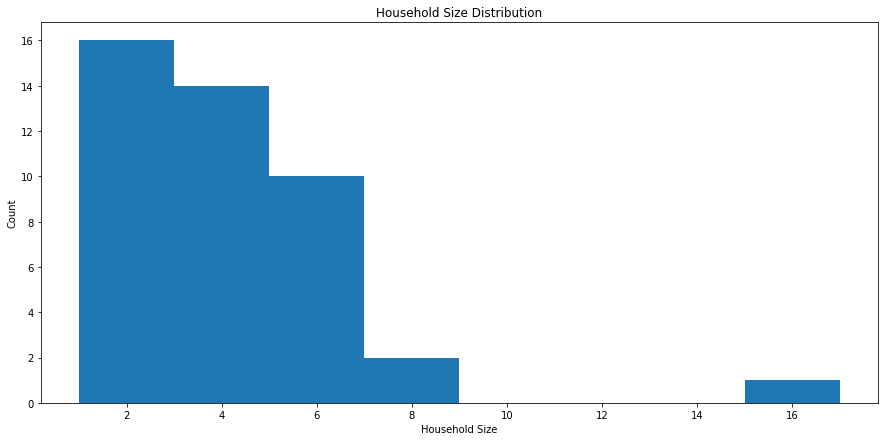

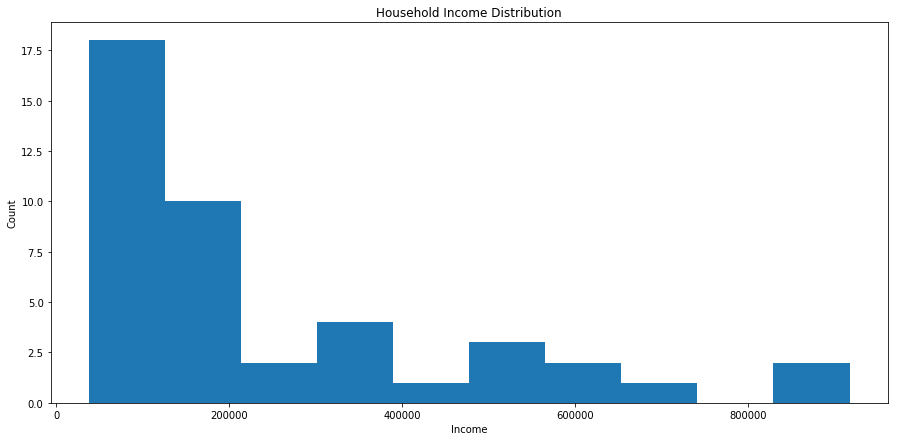

People per house array [1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 7, 7, 4, 2, 17]
Number of individuals in my census block: 163 
Number of households in my census block: 43


In [ ]:
import numpy as np
house_sizes = []
house_income = []

for i in range(len(np.unique(person_df3["HH ID"]))):
    house_sizes.append(len(person_df3.loc[person_df3["HH ID"] == np.unique(person_df3["HH ID"])[i]]))
    house_income.append(sum(person_df3.loc[person_df3["HH ID"] == np.unique(person_df3["HH ID"])[i]]["Income Amount"]))
print(house_sizes, house_income)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,7))
plt.hist(house_sizes, bins=(len(np.unique(house_sizes))))
plt.xlabel('Household Size')
plt.ylabel('Count')
plt.title("Household Size Distribution")
plt.show()


import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,7))
plt.hist(house_income, bins=10)
plt.xlabel('Income')
plt.ylabel('Count')
plt.title("Household Income Distribution")
plt.show()

print "People per house array", house_sizes
print "Number of individuals in my census block:", df3.shape[0], "\nNumber of households in my census block:", len(np.unique(person_df3["HH ID"])) 

In [6]:
print "Total Househole Income:", person_df["Income Amount"].sum()

Total Househole Income: 67929238094.9


In [7]:
# How many people live in your block
total_pop = person_df3.shape[0]
print "Total Population:", total_pop

Total Population: 163


In [8]:
# Sex distribution:
male = person_df3["Sex"].sum() * 1.
perc_male = 100 * male / total_pop 
female = total_pop - male * 1.
perc_female = 100 *female / total_pop
print "Number of Males:", male, "(%", perc_male.round(1) ,")\nNumber of Females:", female, "(%", perc_female.round(1),")"

Number of Males: 85.0 (% 52.1 )
Number of Females: 78.0 (% 47.9 )


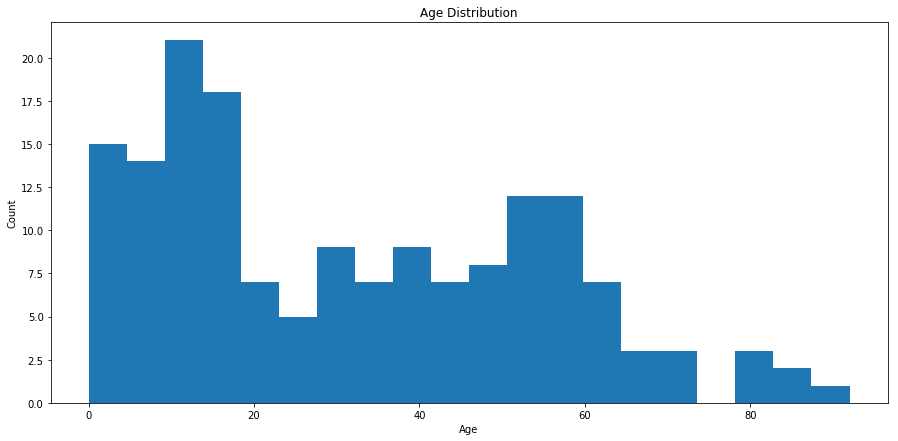

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,7))
plt.hist(person_df3["Age"], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title("Age Distribution")
plt.show()

In [10]:
# Find your HH ID 
print "When looking through the data, all the households with 5 people all have one parent in the age range of 40-55 and" 
print "four children. This seems abnormal because I know many households on my block (including myself) that have 2 parents" 
print "and 3 children."
print
print "With this in mind I chose a household that had children with similar ages to me, so I chose HHID # 3164590."
my_house = person_df3.loc[person_df3["HH ID"] == 3164590]
print 
print "This is \"my house\""
print(my_house[["HH ID", "HH TYPE", "Person ID Number", "Age", "Sex", "Income Amount"]].to_string())

When looking through the data, all the households with 5 people all have one parent in the age range of 40-55 and
four children. This seems abnormal because I know many households on my block (including myself) that have 2 parents
and 3 children.

With this in mind I chose a household that had children with similar ages to me, so I chose HHID # 3164590.

This is "my house"
          HH ID  HH TYPE  Person ID Number  Age  Sex  Income Amount
665371  3164590        0       36008404422   58    0  152018.204097
665372  3164590        0       36008404423   11    1       0.000000
665373  3164590        0       36008404424   12    0       0.000000
665374  3164590        0       36008404425   11    1       0.000000
665375  3164590        0       36008404426   13    1       0.000000


In [28]:
import math
def pixelate(latitude, longitude):
    xPixel = math.floor(138.348*(longitude + 97.5) * math.cos(math.radians(latitude)))
    yPixel = math.floor(138.348*(latitude-37.0))
    return xPixel, yPixel
print(pixelate(40.639091, -73.725510))

def coordinate(xPixel, yPixel):
    Lat = 37.0 + .00722814*(yPixel + .5)
    Long = -97.5 + .00722814*(xPixel + .5)/math.cos(math.radians(Lat))
    return Lat, Long
print(coordinate(pixelate(40.639091, -73.725510)[0], pixelate(40.639091, -73.725510)[1]))


(2495.0, 503.0)
(40.63936849, -73.7292389688167)


Total trips: 14
Number of trips each person in the house makes: [2, 4, 3, 3, 2]
Total Distance:  61.4 miles
Average Trip length  4.4 miles


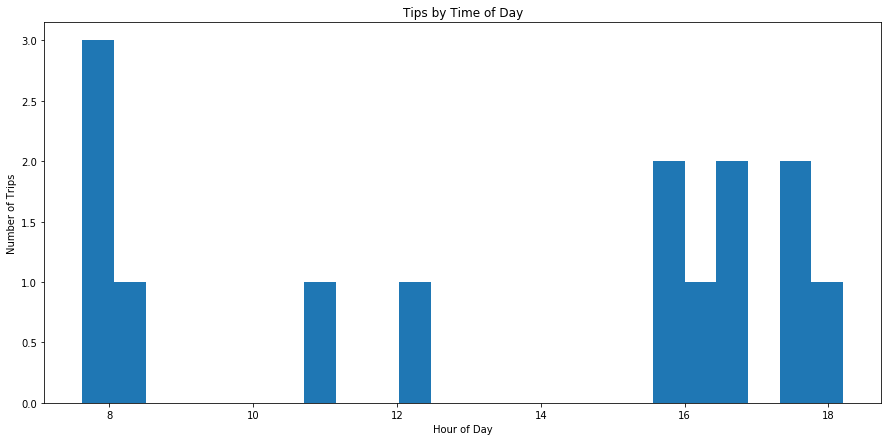

In [29]:
l = []
trip_per_person = []
for i in range(len(my_house)):
    trip_per_person.append(0)
total_distance = 0
my_house_trip = df3.loc[df3["HH ID"] == 3164590]
q = 0
for index, row in my_house_trip.iterrows():
    for j in range(1,7):
        s = "Node "+ str(j+1)+" Name"
        if not (pd.isnull(row[s])):
            trip_per_person[q] += 1
            # {oXpixel,  oYpixel,  oName,  oTime,  dXpixel,  dYpixel,  dName,  1,2xPixel2PixelCartesianDistanceInMiles}
            # get info and send to diff file(put in array)
            p = pixelate(row["Node "+ str(j)+" Lat"], row["Node "+ str(j)+" Lon"])
            p1 = pixelate(row["Node "+ str(j+1)+" Lat"], row["Node "+ str(j+1)+" Lon"])
            oXpixel = p[0]
            oYpixel = p[1]
            oName = row["Node "+ str(j)+" Name"]
            oTime = row["Node "+ str(j)+" Departure Time"]
            dXpixel = p1[0]
            dYpixel = p1[1]
            dName = row["Node "+ str(j+1)+" Name"]
            pixelDistance = 1.2*((math.sqrt((oXpixel - dXpixel)**2 + (oYpixel - dYpixel)**2))*.5)
            total_distance += pixelDistance
            l.append([oXpixel,  oYpixel,  oName,  oTime,  dXpixel,  dYpixel,  dName, pixelDistance])
    q += 1
print "Total trips:", len(l)
print "Number of trips each person in the house makes:", trip_per_person
print "Total Distance: ", round(total_distance, 1), "miles"
avg = total_distance / len(l)
print "Average Trip length ", round(avg,1), "miles"

z = (np.squeeze(l)[:,3])
b = []
for i in z:
    b.append(float(i)/(60*60))
fig, ax = plt.subplots(figsize=(15,7))
plt.hist(b, bins=24)
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.title("Tips by Time of Day")
plt.show()

oXpixel = np.squeeze(l)[:,0].astype(np.float)
oYpixel = np.squeeze(l)[:,1].astype(np.float)

pixels = (np.squeeze(list((oXpixel, oYpixel))).T)

orig_trips = []

for i in range(np.unique(tuple(pixels), axis = 0).shape[0]):
    Bool = (pixels == np.unique(tuple(pixels), axis = 0)[i])
    Bool = Bool[Bool[:,1] == True]
    Val = sum(Bool[:,0] == Bool[:,1])
    orig_trips.append(Val)    

orig_trips = np.reshape(np.array(orig_trips), (len(orig_trips),1))

LL = np.zeros((np.unique(tuple(pixels), axis = 0).shape[0], 2))

for i in range(np.unique(tuple(pixels), axis = 0).shape[0]):
    LL[i] = coordinate(np.unique(tuple(pixels), axis = 0)[i,0], np.unique(tuple(pixels), axis = 0)[i,1])

A = (np.concatenate((np.unique(tuple(pixels), axis = 0),orig_trips , LL), 1))

A = pd.DataFrame(A)
A.to_csv('GoogleArialMap.csv',index=False)


In [13]:
print(list(df3))

['Residence State', 'County Code', 'Tract Code', 'Block Code', 'HH ID', 'Person ID Number', 'Activity Pattern', 'Node 1 Type', 'Node 1 Predecessor', 'Node 1 Successor', 'Node 1 Name', 'Node 1 County', 'Node 1 Lat', 'Node 1 Lon', 'Node 1 Arrival Time', 'Node 1 Departure Time', 'Node 2 Type', 'Node 2 Predecessor', 'Node 2 Successor', 'Node 2 Name', 'Node 2 County', 'Node 2 Lat', 'Node 2 Lon', 'Node 2 Arrival Time', 'Node 2 Departure Time', 'Node 3 Type', 'Node 3 Predecessor', 'Node 3 Successor', 'Node 3 Name', 'Node 3 County', 'Node 3 Lat', 'Node 3 Lon', 'Node 3 Arrival Time', 'Node 3 Departure Time', 'Node 4 Type', 'Node 4 Predecessor', 'Node 4 Successor', 'Node 4 Name', 'Node 4 County', 'Node 4 Lat', 'Node 4 Lon', 'Node 4 Arrival Time', 'Node 4 Departure Time', 'Node 5 Type', 'Node 5 Predecessor', 'Node 5 Successor', 'Node 5 Name', 'Node 5 County', 'Node 5 Lat', 'Node 5 Lon', 'Node 5 Arrival Time', 'Node 5 Departure Time', 'Node 6 Type', 'Node 6 Predecessor', 'Node 6 Successor', 'Node 

In [30]:
# People Living in Your Pixel
# Step 1, add the pixelization of each row of the houses in the county
lis = []
for index, row in df.iterrows():
    lis.append(pixelate(row["Node 1 Lat"], row["Node 1 Lon"]))
    
pixelDat = pd.DataFrame({'pixels':lis})
d = df.join(pixelDat)

nd = d.loc[d["pixels"] == (2495.0, 503.0)]

a = nd[['Tract Code', 'Block Code']].drop_duplicates()

print "Below are the unique Tract-Block combinations that are in my pixel of my house:"
print a
l = a.values.T.tolist()
q = []
for i in range(len(l[0])):
    q.append((l[0][i], l[1][i]))
    

Below are the unique Tract-Block combinations that are in my pixel of my house:
        Tract Code  Block Code
257         411302        4026
2537        411302        4006
2542        411302        5002
2547        411302        5020
5554        411301        2004
5556        411301        2014
16446       411301        2005
16447       411301        2006
16461       411301        2015
16531       411302        4000
16533       411302        4004
16534       411302        4005
16535       411302        4007
16536       411302        4008
188210      411302        4003
188397      411302        4013


In [31]:
# Strip out to make new file/data frame
l = []
trip_per_person = []
for i in range(len(nd)):
    trip_per_person.append(0)
total_distance = 0
q = 0
for index, row in nd.iterrows():
    for j in range(1,7):
        s = "Node "+ str(j+1)+" Name"
        if not (pd.isnull(row[s])):
            trip_per_person[q] += 1
            # {oXpixel,  oYpixel,  oName,  oTime,  dXpixel,  dYpixel,  dName,  1,2xPixel2PixelCartesianDistanceInMiles}
            # get info and send to diff file(put in array)
            p = pixelate(row["Node "+ str(j)+" Lat"], row["Node "+ str(j)+" Lon"])
            p1 = pixelate(row["Node "+ str(j+1)+" Lat"], row["Node "+ str(j+1)+" Lon"])
            oXpixel = p[0]
            oYpixel = p[1]
            oName = row["Node "+ str(j)+" Name"]
            oTime = row["Node "+ str(j)+" Departure Time"]
            dXpixel = p1[0]
            dYpixel = p1[1]
            dName = row["Node "+ str(j+1)+" Name"]
            pixelDistance = 1.2*((math.sqrt((oXpixel - dXpixel)**2 + (oYpixel - dYpixel)**2))*.5)
            total_distance += pixelDistance
            l.append([oXpixel,  oYpixel,  oName,  oTime,  dXpixel,  dYpixel,  dName, pixelDistance])
    q+= 1
import csv

with open('NN_FileOfPeopleLivingInMyPixel2495,503.csv', 'wb') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerows(l)

Total trips: 3926
Trip per person: 2.78835227273
Total Distance:  51539.9 miles
Average Trip length  13.1 miles


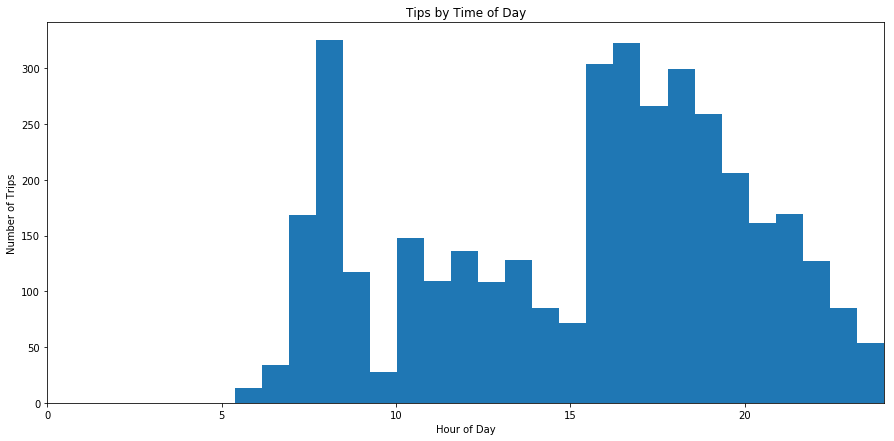

In [32]:
print "Total trips:", len(l)
tpp = len(l) / (1.* len(trip_per_person))
print "Trip per person:", tpp
print "Total Distance: ", round(total_distance, 1), "miles"
avg = total_distance / len(l)
print "Average Trip length ", round(avg,1), "miles"

z = (np.squeeze(l)[:,3])
b = []
for i in z:
    if ((float(i)/(60*60)) > 0 and (float(i)/(60*60) <=24)):
        b.append(float(i)/(60*60))
fig, ax = plt.subplots(figsize=(15,7))
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.title("Tips by Time of Day")
plt.xlim([0,24])
plt.hist(b, bins=24)
plt.show()

In [34]:
oXpixel = np.squeeze(l)[:,0].astype(np.float)
oYpixel = np.squeeze(l)[:,1].astype(np.float)

pixels = (np.squeeze(list((oXpixel, oYpixel))).T)

orig_trips = []

for i in range(np.unique(tuple(pixels), axis = 0).shape[0]):
    Bool = (pixels == np.unique(tuple(pixels), axis = 0)[i])
    Bool = Bool[Bool[:,1] == True]
    Val = sum(Bool[:,0] == Bool[:,1])
    orig_trips.append(Val)    

orig_trips = np.reshape(np.array(orig_trips), (len(orig_trips),1))

LL = np.zeros((np.unique(tuple(pixels), axis = 0).shape[0], 2))

for i in range(np.unique(tuple(pixels), axis = 0).shape[0]):
    LL[i] = coordinate(np.unique(tuple(pixels), axis = 0)[i,0], np.unique(tuple(pixels), axis = 0)[i,1])

A = (np.concatenate((np.unique(tuple(pixels), axis = 0),orig_trips , LL), 1))

A = pd.DataFrame(A)
A.to_csv('GoogleArialMap2.csv',index=False)

In [ ]:
# compute total income for each household
house_sizes = []
house_income = []

for i in range(len(np.unique(person_df["HH ID"]))):
    house_sizes.append((person_df["HH ID"], len(person_df.loc[person_df["HH ID"] == np.unique(person_df["HH ID"])[i]])))
    house_income.append(sum(person_df3.loc[person_df["HH ID"] == np.unique(person_df["HH ID"])[i]]["Income Amount"]))
print(house_sizes, house_income)